# Домашнее задание 8

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 21 апреля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_8

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим билинейную седловую задачу:
\begin{equation}
\min_{x \in [-10; 10]^d} \max_{y \in [-10; 10]^d} f(x,y) = (x-b_x)^T A (y - b_y) + \frac{\lambda}{2}\| x - b_x\|^2 - \frac{\lambda}{2}\| y - b_y\|^2,
\end{equation}
где в качестве матрицы $A$ - случайно сгенерированная матрица с $L =1000$, $\mu = 0.01$, $d = 100$, $b_x$ и $b_y$ - случайные векторы c компонентами из отрезка $[-10; 10]$, $\lambda = 1$.

__(а)__ Какое решение у данной задачи? Является ли данная задача сильно выпуклой по $x$ и сильно вогнутой по $y$? Если да, то чему равна константа сильной выпуклости? Является ли оператор, соотвествующего это задаче вариационного неравенства, сильно монотонным? Липшицевым? Чему равны $L$ и $\mu$ для данного оператора? 

Соответственно, чтобы решить данную задачу мы запишем градиенты по x и по y, и посмотрим, что получится

$$ F(z) = \begin{pmatrix}
\nabla_xf(x,y)\\
-\nabla_yf(x,y)
\end{pmatrix} = \begin{pmatrix}
A(y-b_y) + \lambda(x-b_x)\\
-A^{T}(x - b_{x}) + \lambda(y-b_y)
\end{pmatrix} $$

\begin{equation*}
 \begin{cases}
   A(y - b_{y}) + \lambda(x - b_{x}) = 0, 
   \\
   -A^{T}(x - b_{x}) + \lambda(y - b_{y}) = 0
 \end{cases}
\end{equation*}

Из которой, недолго думая, можно получить, что: 
    \begin{equation*}
     \begin{cases} 
     x = b_{x}
   \\
     y = b_{y}
 \end{cases}
\end{equation*}

Посчитаем теперь константу сильной выпуклости: для этого посчитаем гессиан функции f по переменной $x$: 
        $$H_{x} = \lambda$$ 
 
Аналогично проделываем с гессианом по переменной y и получаем, что: 
        $$H_{y} = \lambda$$

Значит константы сильной выпуклости равны $\mu_{x} = \mu_{y} = \lambda$

Значит задача является сильно выпуклой и сильной вогнутой по $x$ и $y$ соответственно. 

Проверим теперь сильную монотонность. По определению сильная монотонность это: 

$$ (F(z_{1}) - F(z_{2})), z_{1} - z_{2}) \geq \mu ||z_{1} - z_{2}||^{2}$$ 

$$(A(y_{1} - y_{2}) + \lambda (x_{1} - x_{2}), x_{1} - x_{2}) + (-A^{T}(x_{1} - x_{2}) + \lambda(y_{1} - y_{2}), y_{1} - y_{2}) = \lambda ||x_{1} - x_{2}||^{2} + \lambda ||y_{1} - y_{2}||^{2} + 0 = \lambda ||z_{1} - z_{2}||^{2}$$ 

Отсюда следует, что $\mu = \lambda$ - константа сильной монотонности.  

Теперь определим константу Липшица нашей функции. Запишем по определению:  

 $$ ||F(z_{1}) - F(z_{2})|| \leq L||z_{1} - z_{2}|| $$ 
 
 Возведем это все в квадрат и получим: 

$$ (A(y_{1} - y_{2})+\lambda (x_{1} - x_{2}),A(y_{1} - y_{2})+\lambda (x_{1} - x_{2})) + (-A^{T}(x_{1} - x_{2})+\lambda (y_{1} - y_{2}), -A^{T}(x_{1} - x_{2})+\lambda (y_{1} - y_{2}))\leq L^2(\|x_{1} - x_{2}\|^2+\|y_{1} - y_{2}\|^2)$$

Таким образом получаем, что 

$ \|A(y_{1} - y_{2})\|^2 + \lambda^2\|x_{1} - x_{2}\|^2 + \|A^{T}(x_{1} - x_{2})\|^2 + \lambda^2\|y_{1} - y_{2}\|^2 \leq L^2(\|(x_{1} - x_{2})\|^2+\|y_{1} - y_{2}\|^2) \Rightarrow L = \sqrt{L^{2}_{matrix} + \lambda^2}$

Таким образом, мы получили константу Липишица для данной задачи.

__(б)__ Решите данную задачу с помощью метода градиентного спуска(подъема) с проекцией и с помощью метода Экстраградиента с проекцией(смотри Секцию 3.3 [статью](https://arxiv.org/pdf/1802.10551.pdf)). Для начала попробуйте теоретические шаги для данных методов. Далее подберите шаг для наилучшей сходимости. Постройте график сходимости (относительное расстояние до решения по аргументу от числа подсчетов градиентов). На графике должно быть 4 линии, по две на каждый из методов. Сделайте вывод.

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import math  
import time 
from numpy import linalg   
import random 

In [15]:
random.seed(42) 

In [137]:
def rvs(dim=3):
     random_state = np.random
     H = np.eye(dim)
     D = np.ones((dim,))
     for n in range(1, dim):
         x = random_state.normal(size=(dim-n+1,))
         D[n-1] = np.sign(x[0])
         x[0] -= D[n-1]*np.sqrt((x*x).sum())
         # Householder transformation
         Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
         mat = np.eye(dim)
         mat[n-1:, n-1:] = Hx
         H = np.dot(H, mat)
     D[-1] = (-1)**(1-(dim % 2))*D.prod()
     H = (D*H.T).T
     return H
    
def generate_matrix(d, m, L):  
    A = np.eye(d) 
    A[0, 0] = L
    A[1, 1] = m
    S = rvs(d) 
    A = np.dot(np.linalg.inv(S), np.dot(A, S))
    return A 

In [138]:
L = 1000 
mu = 0.01 
d = 100

In [139]:
b_1 = np.random.uniform(low=-10.0, high=10.0, size=(100,))  
b_2 = np.random.uniform(low=-10.0, high=10.0, size=(100,))

In [140]:
A = generate_matrix(100, 0.01, 1000)

In [141]:
def grad(A, bx, by, x, y): 
    return (np.dot(A, y - by) + (x - bx), -np.dot(A.T, x - bx) + (y - by)) 

In [142]:
def proj(x): 
    for i in range(len(x)): 
        if(x[i] > 10): 
            x[i] = 10 
        elif(x[i] < -10): 
            x[i] = -10 
    return x

In [143]:
class GradientDescent: 
    def __init__(self, A, bx, by, d, max_iter, alpha): 
        self.A = A  
        self.d = d
        self.bx = bx 
        self.by = by 
        self.norm_history = [] 
        self.alpha = alpha  
        self.max_iter = max_iter 
        self.x = None
        self.y = None 
        
    def fit(self): 
        self.x = np.zeros(self.d) 
        self.y = np.zeros(self.d)  
        for i in range(self.max_iter): 
            gx, gy = grad(self.A, self.bx, self.by, self.x, self.y) 
            self.x = proj(self.x - self.alpha * gx) 
            self.y = proj(self.y - self.alpha * gy)  
            dist = np.linalg.norm(self.x - self.bx)**2 + np.linalg.norm(self.y - self.by)**2 
            abs_dist = np.linalg.norm(self.bx)**2 + np.linalg.norm(self.by)**2
            self.norm_history.append(dist/abs_dist)

In [144]:
class ExtraGradientDescent: 
    def __init__(self, A, bx, by, d, max_iter, alpha): 
        self.A = A
        self.d = d 
        self.bx = bx 
        self.by = by 
        self.norm_history = []  
        self.alpha = alpha 
        self.max_iter = max_iter 
        self.x = None 
        self.y = None 
    
    def fit(self): 
        self.x = np.zeros(self.d) 
        self.y = np.zeros(self.d)  
        u = np.zeros(self.d) 
        v = np.zeros(self.d)
        gx, gy = grad(self.A, self.bx, self.by, u, v)  
        for i in range(-1, self.max_iter, 2): 
            u = proj(self.x - self.alpha * gx) 
            v = proj(self.y - self.alpha * gy) 
            gx, gy = grad(self.A, self.bx, self.by, u, v) 
            self.x = proj(self.x - self.alpha * gx) 
            self.y = proj(self.y - self.alpha * gy) 
            dist = np.linalg.norm(self.x - self.bx)**2 + np.linalg.norm(self.y - self.by)**2 
            abs_dist = np.linalg.norm(self.bx)**2 + np.linalg.norm(self.by)**2
            self.norm_history.append(dist/abs_dist)  

In [188]:
gd = GradientDescent(A, b_1, b_2, d, 1000, mu/(L * L)) 
egd = ExtraGradientDescent(A, b_1, b_2, d, 1000, 1/(3 * L))

In [189]:
gd_test = GradientDescent(A, b_1, b_2, d, 1000, 40/(L * L))  
egd_test = ExtraGradientDescent(A, b_1, b_2, d, 1000, 2/(3 * L))

In [190]:
gd.fit() 
egd.fit() 

In [191]:
gd_test.fit() 
egd_test.fit() 

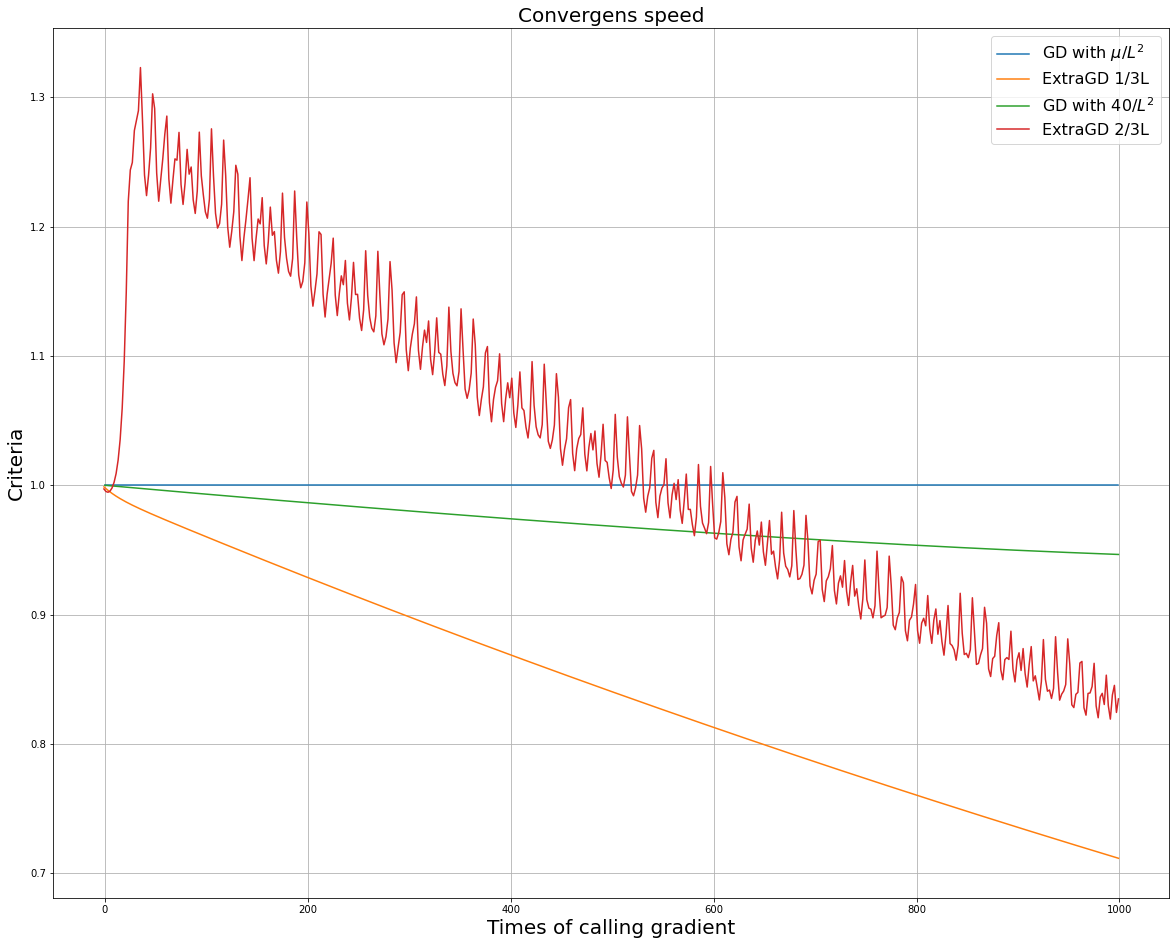

In [193]:
plt.figure(figsize=(20, 16))   

plt.title('Convergens speed', fontsize=20) 

plt.plot(range(gd.max_iter), gd.norm_history, label=r'GD with $\mu /L^{2}$') 
plt.plot(range(-1, egd.max_iter, 2), egd.norm_history, label='ExtraGD 1/3L') 
plt.plot(range(gd_test.max_iter), gd_test.norm_history, label=r'GD with $40/L^{2}$') 
plt.plot(range(-1, egd_test.max_iter, 2), egd_test.norm_history, label='ExtraGD 2/3L') 
plt.ylabel('Criteria', fontsize=20) 
plt.xlabel('Times of calling gradient', fontsize=20)
plt.grid() 
plt.legend(fontsize=16) 
plt.show()

## Видим, что экстраградиент сильно превосходит по сходимости обычный градиентный спуск. Видим также, что оба метода не сильно отклоняются от их теоретических релуьтатов.

## Задача 2

Теперь рассмотрим билинейную задачу на симплексе. Описание задачи возьмите из [лекций](https://www2.isye.gatech.edu/~nemirovs/BrazilTransparenciesJuly4.pdf) - Слайд 125 "How it Works: Policeman vs. Burglar" и следующий.

__(а)__ Сгенерируйте матрицу для данной задачи размера $n=10$ c $\theta = 1$.

In [219]:
n = 10  

houses = np.zeros((n, n))  
for i in range(n): 
    for j in range(n): 
        houses[i][j] = np.random.uniform(low = 1, high = 10, size=1) + np.random.normal(loc=1, scale=0.3, size=1)  
        
A = np.zeros((n**2, n**2)) 

for i in range(n): 
    for j in range(n): 
        for k in range(n): 
            for l in range(n): 
                A[i * n + j][k * n + l] = houses[i][j] * (1 - np.exp(-np.absolute(i - k) - np.absolute(j - l)))

__(б)__ Для данной задачи предложите модификацию метода Экстраградиента, которая учитывает, что задача решается на симплексе. В этом может помочь [статья](https://arxiv.org/pdf/0809.0815.pdf) (смотри Секцию 3.3). Реализуйте данный метод.

Имплементируем алгоритм из статьи и посмотрим на ошибку, рассчитанную по формуле:  

$$Error = max_{x, y}(g(x_{k}, y) - g(x, y_{k}))$$

In [323]:
def grad(A, x, y): 
    return (np.dot(A.T, y), -np.dot(A, x)) 

In [324]:
def error(g, d): 
    m = -10**6 
    
    for i in range(d): 
        for j in range(d): 
            if(-g[1][i] - g[0][j] > m): 
                m = -g[1][i] - g[0][j] 
    return m 

In [325]:
def proj(x, gx, d): 
    p = np.zeros(d)
    tmp = 0.
    for i in range(d):
        tmp += x[i] * np.exp(-gx[i])
    tmp = 1/tmp
    for i in range(d):
        p[i] = tmp * (x[i]*np.exp(-gx[i]))
    return p

In [326]:
class GDS: 
    def __init__(self, A, d, alpha, max_iter): 
        self.A = A 
        self.d = d 
        self.alpha = alpha 
        self.grad_history = []   
        self.max_iter = max_iter
        self.x = None 
        self.y = None  
        self.w_x = None 
        self.w_y = None
    
    def fit(self): 
        self.x = np.ones(self.d) 
        self.x /= self.d  
        self.y = np.ones(self.d) 
        self.y /= self.d 
        self.w_x = np.zeros(self.d) 
        self.w_y = np.zeros(self.d) 
        
        for i in range(self.max_iter):  
            g = grad(self.A, self.x, self.y)
            self.w_x = proj(self.x, self.alpha * g[0], self.d) 
            self.w_y = proj(self.y, self.alpha * g[1], self.d)  
            g_w = grad(self.A, self.w_x, self.w_y)
            self.x = proj(self.x, self.alpha * g_w[0], self.d)  
            self.y = proj(self.y, self.alpha * g_w[1], self.d)  
            e = error(g, self.d) 
            self.grad_history.append(e)   

__(в)__ Решите билинейную задачу на симплексе с помощью нового метода и методов из Задачи 1. Как будете измерять сходимость? Возможно, в работах, из которых были взяты методы, найдется ответ. Постройте график сходимости. Визуализирйте полученный ответ, как это сделано в файле с лекциями. Сделайте вывод.  

Воспользуемся алгоритмом проекции на симплекс из предыдущих дз(4 домашняя работа - алгоритм евклидовой проекции на вероятностный симплекс)

In [327]:
def projl2(y): 
    y_sorted = np.sort(y)[::-1] 
    s = 0  
    ro = 0 
    sum_ro = 0 
    for i in range(len(y)): 
        s += y_sorted[i] 
        if(y_sorted[i] + 1/(i + 1) * (1 - s) > 0): 
            ro = i + 1
            sum_ro = s  
    l = 1/ro * (1 - sum_ro)  
    x = np.zeros(len(y))
    for i in range(len(y)): 
        x[i] = max(y[i] + l, 0) 
    return x 

In [328]:
class GradientDescent: 
    def __init__(self, A, d, alpha, max_iter): 
        self.A = A 
        self.d = d 
        self.alpha = alpha 
        self.grad_history = []   
        self.max_iter = max_iter
        self.x = None 
        self.y = None  
        
    def fit(self): 
        self.x = np.ones(self.d) 
        self.x /= self.d 
        self.y = np.ones(self.d)   
        self.y /= self.d
        for i in range(self.max_iter): 
            g = grad(self.A, self.x, self.y) 
            self.x = projl2(self.x - self.alpha * g[0]) 
            self.y = projl2(self.y - self.alpha * g[1])  
            e = error(g, self.d) 
            self.grad_history.append(e)    

In [335]:
class ExtraGradient:  
    def __init__(self, A, d, alpha, max_iter): 
        self.A = A 
        self.d = d 
        self.alpha = alpha 
        self.grad_history = []   
        self.max_iter = max_iter
        self.x = None 
        self.y = None  
    
    def fit(self): 
        self.x = np.ones(self.d) 
        self.x /= self.d 
        self.y = np.ones(self.d)  
        self.y /= self.d
        u = np.ones(self.d) 
        u /= self.d
        v = np.ones(self.d) 
        v /= self.d 
        gx, gy = grad(self.A, u, v)  
        for i in range(self.max_iter): 
            u = projl2(self.x - self.alpha * gx) 
            v = projl2(self.y - self.alpha * gy) 
            g = grad(self.A, u, v) 
            self.x = projl2(self.x - self.alpha * g[0]) 
            self.y = projl2(self.y - self.alpha * g[1]) 
            e = error(g, self.d) 
            self.grad_history.append(e) 

In [347]:
gd = GradientDescent(A, n**2, 1/1000, 2 * 10**3) 
egd = ExtraGradient(A, n**2, 1/1000, 2 * 10**3) 
gds = GDS(A, n**2, 1/1000, 2 * 10**3)

In [348]:
gd.fit() 
egd.fit()  
gds.fit()

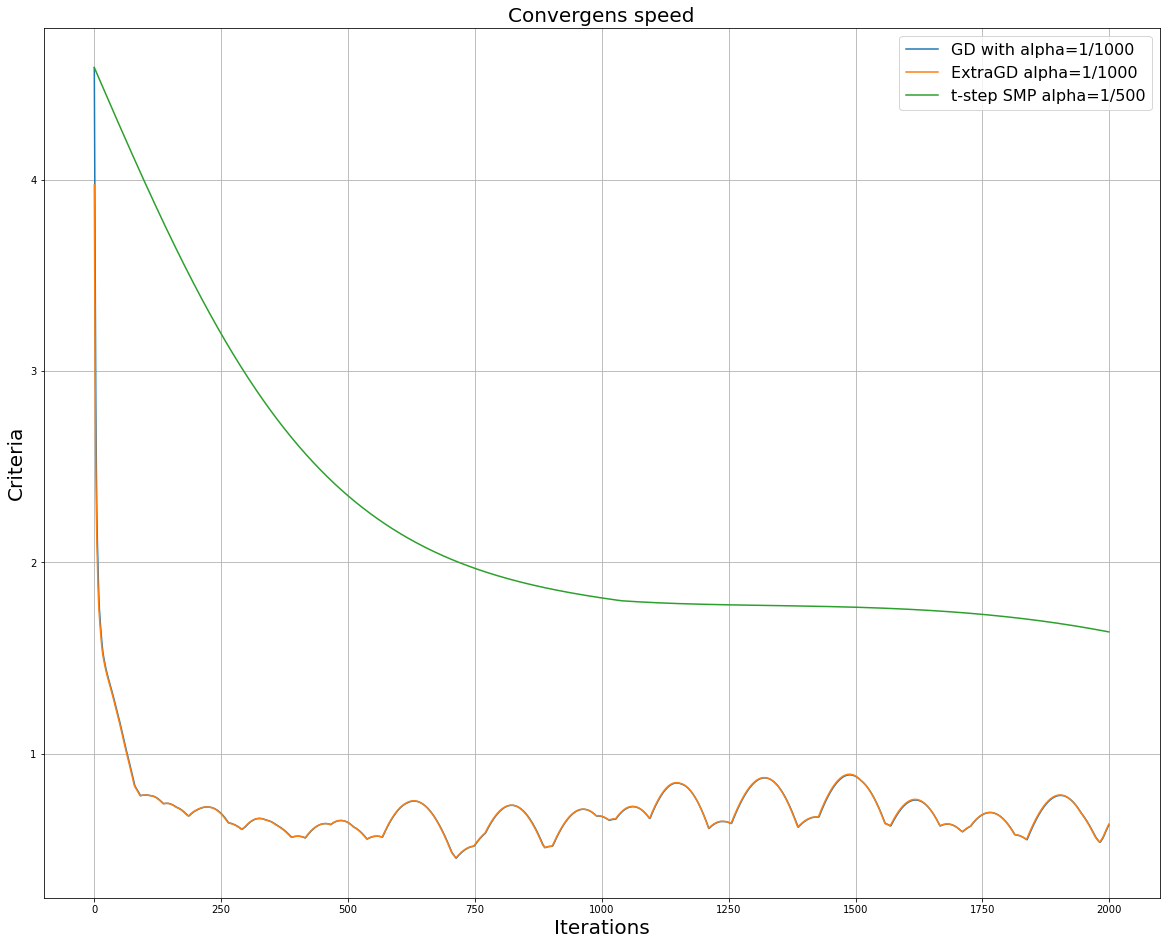

In [349]:
plt.figure(figsize=(20, 16))   

plt.title('Convergens speed', fontsize=20) 

plt.plot(range(gd.max_iter), gd.grad_history, label=r'GD with alpha=1/1000') 
plt.plot(range(egd.max_iter), egd.grad_history, label=r'ExtraGD alpha=1/1000') 
plt.plot(range(gds.max_iter), gds.grad_history, label=r't-step SMP alpha=1/500')
plt.ylabel('Criteria', fontsize=20) 
plt.xlabel('Iterations', fontsize=20)
plt.grid() 
plt.legend(fontsize=16) 
plt.show()

Text(0.5, 0, 'cost')

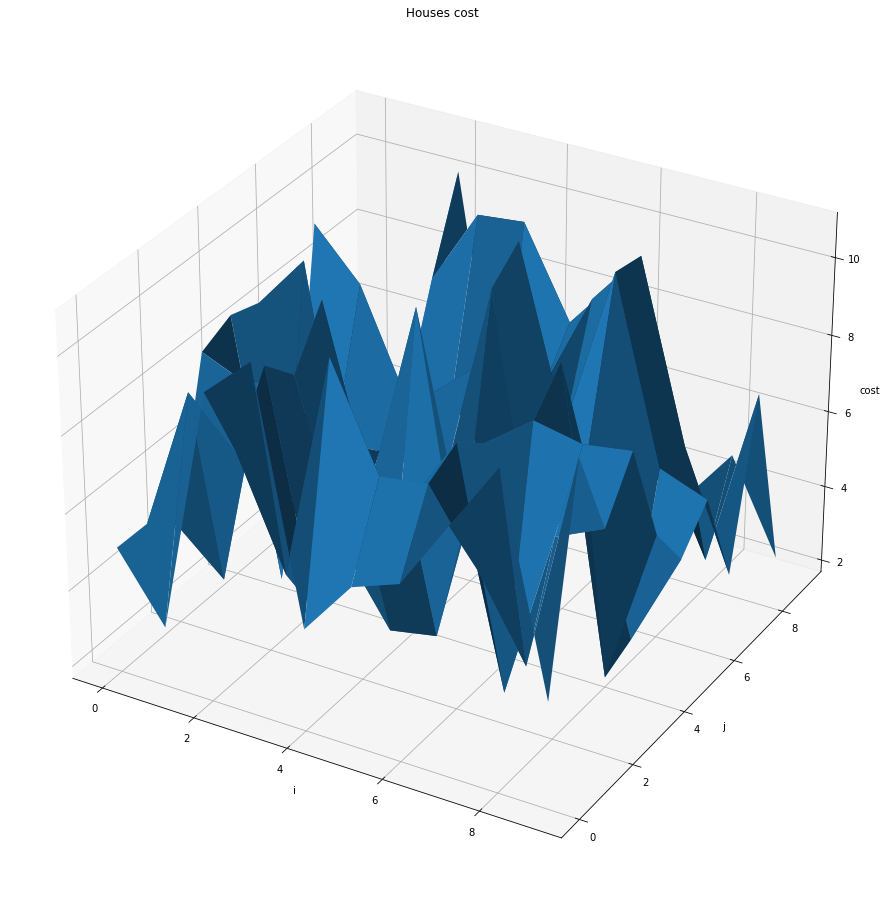

In [360]:
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D 

xx = [i for i in range(n)] 
yy = [i for i in range(n)] 
X, Y = np.meshgrid(xx, yy) 
Z = np.copy(houses) 

fig = plt.figure(figsize=(20,16))  
ax = fig.add_subplot(1, 1, 1, projection='3d')  
ax.set_title('Houses cost')
ax.plot_surface(X, Y, Z) 
ax.set_xlabel('i') 
ax.set_ylabel('j') 
ax.set_zlabel('cost') 

__Бонусные пункты__

__(г)__ Реализуйте методы из Секции 3 [работы](https://arxiv.org/pdf/1908.08465.pdf). Решите с помощью них Задачу 1. Добавьте сходимость на график из пункта (б) Задачи 1.

In [ ]:
#ответ

__(д)__ Реализуйте Алгоритм 1 и Алгоритм 2 из [работы](https://arxiv.org/pdf/2102.08352.pdf). Решите с помощью них Задачу 2 (могут помочь Секции 5 и 6 из упомянутой работы). Добавьте сходимость на график из пункта (в) Задачи 2, предварительно поменяв ось $x$ (что теперь будете откладывать по оси $x$?).

In [ ]:
#ответ